In [115]:
using GaussianProcesses
using Random
using DataFrames
using StatsBase
using CSV
using Plots
using Optim
using Distributions

In [37]:
include("/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/gpdata.jl");

In [126]:
include("/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/samples.jl");

# GP Start 10 x 53 dataset

## Import Data

In [29]:
dp_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/samples/samples_0524_10.csv"
dp_data = DataFrame(CSV.File(dp_path))
X = Matrix(dp_data)

38×10 Matrix{Float64}:
 0.5         0.25       0.75       …  0.0625     0.5625     0.3125
 0.333333    0.666667   0.111111      0.888889   0.037037   0.37037
 0.2         0.4        0.6           0.64       0.84       0.08
 0.142857    0.285714   0.428571      0.163265   0.306122   0.44898
 0.0909091   0.181818   0.272727      0.727273   0.818182   0.909091
 0.0769231   0.153846   0.230769   …  0.615385   0.692308   0.769231
 0.0588235   0.117647   0.176471      0.470588   0.529412   0.588235
 0.0526316   0.105263   0.157895      0.421053   0.473684   0.526316
 0.0434783   0.0869565  0.130435      0.347826   0.391304   0.434783
 0.0344828   0.0689655  0.103448      0.275862   0.310345   0.344828
 ⋮                                 ⋱                        
 0.00884956  0.0176991  0.0265487     0.0707965  0.079646   0.0884956
 0.00787402  0.015748   0.023622   …  0.0629921  0.0708661  0.0787402
 0.00763359  0.0152672  0.0229008     0.0610687  0.0687023  0.0763359
 0.00729927  0.0145985  

In [74]:
# "objective" values 
sim_data_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/sim_data/0524_batch_00_00.csv"
sim_data = DataFrame(CSV.File(sim_data_path; drop=[1]))
Y = Matrix(sim_data)./10e9 # 12 * 100

# historical data
hist_data_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/hist_data/elect.csv"
hist_data = DataFrame(CSV.File(hist_data_path; drop=[1]))
h = Matrix(hist_data)./10e9 # 12 * 1

# normalized rmse (not comprable to ASHRAE standards??)
y = []
for i=1:size(Y,2)
    append!(y, rmsd(Y[:, i], h, normalize=false))
end

y = convert(Array{Float64,1}, y); # GJ

In [33]:
println("x $(size(X)), y $(size(y))")

# x (dimensions, samples)
# data should be like this: x (2, 50), y (50,)

x (38, 10), y (10,)


# Make the GP

In [34]:
m = MeanZero()
zero_d = zeros(size(X,2))
kern = Const(0) #Matern(5/2,zero_d,0.0)

Type: Const{Int64}, Params: [0]

In [35]:
gp = GP(X,y,m,kern)

GP Exact object:
  Dim = 38
  Number of observations = 10
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: Const{Int64}, Params: [0]
  Input observations = 
[0.5 0.25 … 0.5625 0.3125; 0.3333333333333333 0.6666666666666666 … 0.037037037037037035 0.37037037037037035; … ; 0.006369426751592357 0.012738853503184714 … 0.05732484076433121 0.06369426751592357; 0.006134969325153374 0.012269938650306749 … 0.05521472392638037 0.06134969325153374]
  Output observations = [3.7779700602079904, 3.662858985449671, 3.0888733912752153, 3.4092675974891713, 2.9642160140360225, 3.283820135330946, 2.4014004997207428, 3.158433922959106, 2.5140619777620925, 3.1752359570181037]
  Variance of observation noise = 0.01831563888873418
  Marginal Log-Likelihood = -44.934

## Predict and Score

In [38]:
y_hat = predict_f(gp, X)[1]
r0 = rmsd(y_hat, y) # rmse for mlj go from sci kit learn was 1.33... but are rmse and rmsd the same?

0.4178754889110125

## Optimize Hyperparameters

In [51]:
m = MeanZero()
kern = SE(1.0, 1.0)
gp1 = GP(X,y,m,kern)

GP Exact object:
  Dim = 38
  Number of observations = 10
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: SEIso{Float64}, Params: [1.0, 1.0]
  Input observations = 
[0.5 0.25 … 0.5625 0.3125; 0.3333333333333333 0.6666666666666666 … 0.037037037037037035 0.37037037037037035; … ; 0.006369426751592357 0.012738853503184714 … 0.05732484076433121 0.06369426751592357; 0.006134969325153374 0.012269938650306749 … 0.05521472392638037 0.06134969325153374]
  Output observations = [3.7779700602079904, 3.662858985449671, 3.0888733912752153, 3.4092675974891713, 2.9642160140360225, 3.283820135330946, 2.4014004997207428, 3.158433922959106, 2.5140619777620925, 3.1752359570181037]
  Variance of observation noise = 0.01831563888873418
  Marginal Log-Likelihood = -6.483

In [52]:
y_hat = predict_f(gp1, X)[1]
r0 = rmsd(y_hat, y)

0.025655989489074525

In [76]:
m = MeanZero()
kern = SE(2.0, 2.0)
gp2 = GP(X,y,m,kern)
y_hat = predict_f(gp2, X)[1]
r0 = rmsd(y_hat, y)

0.037685561768383495

In [87]:
m = MeanZero()
kern = SE(0.09, 0.7)
gp2 = GP(X,y,m,kern)
y_hat = predict_f(gp2, X)[1]
r0 = rmsd(y_hat, y)

0.00997691213900995

# Plot?

In [89]:
μ, Σ = predict_y(gp2,X);

In [135]:
X

38×10 Matrix{Float64}:
 0.5         0.25       0.75       …  0.0625     0.5625     0.3125
 0.333333    0.666667   0.111111      0.888889   0.037037   0.37037
 0.2         0.4        0.6           0.64       0.84       0.08
 0.142857    0.285714   0.428571      0.163265   0.306122   0.44898
 0.0909091   0.181818   0.272727      0.727273   0.818182   0.909091
 0.0769231   0.153846   0.230769   …  0.615385   0.692308   0.769231
 0.0588235   0.117647   0.176471      0.470588   0.529412   0.588235
 0.0526316   0.105263   0.157895      0.421053   0.473684   0.526316
 0.0434783   0.0869565  0.130435      0.347826   0.391304   0.434783
 0.0344828   0.0689655  0.103448      0.275862   0.310345   0.344828
 ⋮                                 ⋱                        
 0.00884956  0.0176991  0.0265487     0.0707965  0.079646   0.0884956
 0.00787402  0.015748   0.023622   …  0.0629921  0.0708661  0.0787402
 0.00763359  0.0152672  0.0229008     0.0610687  0.0687023  0.0763359
 0.00729927  0.0145985  

In [103]:
μ

10-element Vector{Float64}:
 3.754167800854813
 3.6712227737167127
 3.092524712280445
 3.4036733434618323
 2.9635665033016876
 3.2863268716850143
 2.412937393116426
 3.151059593515747
 2.511633630109378
 3.1645506248768007

In [105]:
plotx = X[1,:]

10-element Vector{Float64}:
 0.5
 0.25
 0.75
 0.125
 0.625
 0.375
 0.875
 0.0625
 0.5625
 0.3125

In [131]:
px = sortperm(plotx);

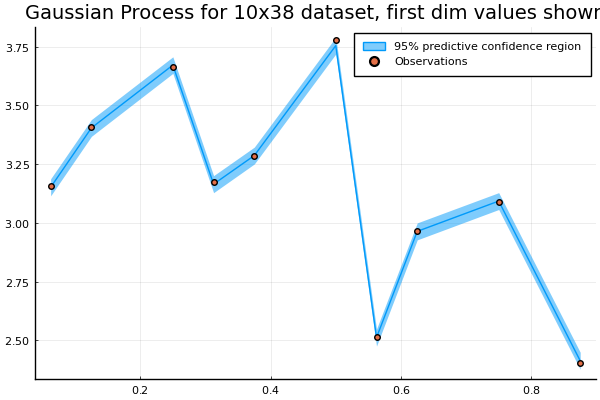

In [114]:
plot(plotx[px],μ[px],ribbon=Σ[px], title="Gaussian Process for 10x38 dataset, first dim values shown",label="95% predictive confidence region")
scatter!(plotx[px],y[px],label="Observations")

# what makes more sense for plotting -> organize matrix based on the distance from each pt from the zero vector, then plot mu vs their indices
# or dimensionality reduction / pca, and plot vs that ...


# Acquisition Function 

In [174]:
# expected improvement implementation based on ch 16 
prob_of_improvement(y_min, μ, σ) = cdf(Normal(μ, σ), y_min)

function expected_improvement(y_min, μ, σ)
    p_imp = prob_of_improvement(y_min, μ, σ)
    p_ymin = pdf(Normal(μ, σ), y_min)
    return (y_min - μ)*p_imp + σ^2*p_ymin
end

expected_improvement (generic function with 1 method)

In [150]:
# best observed y so far (from simulations!)
y_min = minimum(y) 

2.4014004997207428

## Implementation

In [166]:

function expected_improvement_pt(num_pts, dims, Xa=false)
    # generate samples (need samples.jl)
    if Xa==false
        Xa = mapreduce(permutedims, vcat, get_filling_set_halton(num_pts, dims))'
    end
    # get predictions of means and std based on fitted gp
    μa, Σa = predict_y(gp2,Xa);
    # find the expected improvements 
    e = []
    for (m, s) in zip(μa, Σa)
        push!(e,  expected_improvement(y_min, m, s))
    end
    best_e_index = findmax(e)[2]
    # e_sort = sortperm(e, rev=true)
    # println("sorted expectations", e[e_sort])
    best_x = Xa[:,best_e_index]
    return best_x

end

expected_improvement_pt (generic function with 2 methods)

In [175]:
expected_improvement_pt(30, 38, Xa)

38-element Vector{Float64}:
 0.84375
 0.012345679012345678
 0.40800000000000003
 0.9183673469387754
 0.4710743801652893
 0.08875739644970415
 0.5916955017301039
 0.4238227146814404
 0.17580340264650282
 0.9310344827586207
 ⋮
 0.23893805309734512
 0.2125984251968504
 0.20610687022900762
 0.1970802919708029
 0.19424460431654678
 0.18120805369127516
 0.17880794701986755
 0.17197452229299365
 0.16564417177914112

In [176]:
expected_improvement_pt(12, 38)

38-element Vector{Float64}:
 0.8125
 0.7037037037037037
 0.28
 0.5918367346938775
 0.008264462809917356
 0.8461538461538463
 0.6470588235294118
 0.5789473684210527
 0.4782608695652174
 0.3793103448275862
 ⋮
 0.09734513274336283
 0.08661417322834646
 0.08396946564885496
 0.08029197080291971
 0.07913669064748202
 0.0738255033557047
 0.0728476821192053
 0.07006369426751592
 0.06748466257668712

In [ ]:
# mu and std are of a given point 
# todo -> generate a sampling of x values spanning the space (quasi random -> maybe try out additive recurrence?)
# do gaussian predictions on these points, get mu and sigma 
# for each point determine expected improvement
# point with the greatest expected improvement is the next pt to pass to the simulation 

# GP Example

In [57]:
#Training data
d, n = 2, 50;         #Dimension and number of observations
x = 2π * rand(d, n);                               #Predictors
y = vec(sin.(x[1,:]).*sin.(x[2,:])) + 0.05*rand(n);  #Responses
println("x $(size(x)), y $(size(y))")

x (2, 50), y (50,)


In [55]:
mZero = MeanZero()                             # Zero mean function
kern = Matern(5/2,[0.0,0.0],0.0) + SE(0.0,0.0)

Type: SumKernel{Mat52Ard{Float64}, SEIso{Float64}}
  Type: Mat52Ard{Float64}, Params: [-0.0, -0.0, 0.0]  Type: SEIso{Float64}, Params: [0.0, 0.0]

In [58]:
gp = GP(x,y,mZero,kern,-2.0)

GP Exact object:
  Dim = 2
  Number of observations = 50
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: SumKernel{Mat52Ard{Float64}, SEIso{Float64}}
      Type: Mat52Ard{Float64}, Params: [-0.0, -0.0, 0.0]      Type: SEIso{Float64}, Params: [0.0, 0.0]
  Input observations = 
[0.5739545444335041 1.292908659829219 … 3.970644933944377 3.380089047605813; 0.4221080301575079 5.30337035452372 … 2.7113222675074518 1.9568239308657538]
  Output observations = [0.2716228650034465, -0.7756495485444646, -0.4950260389543699, -0.44023050947673886, -0.09881810602488579, 0.018764824919486653, -0.8396922951191799, 0.1570502986455237, 0.18997527526994684, -0.773089763347234  …  -0.04861105501921333, -0.49906348464288536, 0.15619321236720146, 0.7033601831092581, 0.012583026406322485, -0.25230949710021444, -0.18433862547563457, 0.549102685356359, -0.2785966057268125, -0.21294678732728498]
  Variance of observation noise = 0.01831563888873418
  Marginal Log-Likelihood = -24.938

In [61]:
y_hat = predict_f(gp, x)[1]
r0 = rmsd(y_hat, y)

0.005768174027135687

In [71]:
optimize!(gp)

 * Status: success

 * Candidate solution
    Final objective value:     -5.465262e+01

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = 7.90e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:   1


In [63]:
y_hat = predict_f(gp, x)[1]
r0 = rmsd(y_hat, y)

0.011408926005845603

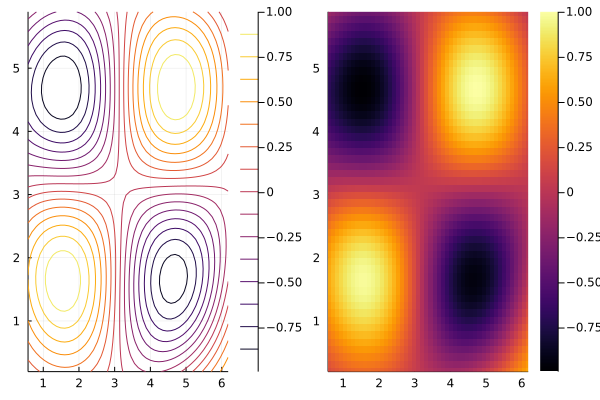

In [66]:
plot(contour(gp) ,heatmap(gp); fmt=:png)